<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/%EC%A0%95%EC%9C%A0%EC%84%9D_3%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 머신러닝 문제
1. bike.csv 파일을 불러오세요.

* datetime : 기록 일시(1시간 간격)
* season : 계절(봄 : 1, 여름 : 2, 가을 : 3, 겨울 : 4)
* holiday : 공휴일 여부(0 : 공휴일 아님, 1 : 공휴일)
* workingday : 근무일 여부(0 : 근무일 아님, 1 : 근무일)
* weather : 날씨(1 : 맑음, 2 : 옅은 안개, 3 : 약한 눈 or 약한 번개 or 흐림, 4 : 폭우 or 짙은 안개)
* temp : 실제 온도
* atemp : 체감 온도
* humidity : 상대 습도
* windspeed : 풍속
* casual : 등록되지 않은 사용자(비회원 수)
* registered : 등록된 사용자(회원) 수
* count : 자전거 대여 수량

In [ ]:
import pandas as pd
bike=pd.read_csv('bike.csv')

2. 자전거 대여 수요 예측을 해주는 프로그램을 만들어보세요. 다양한 모델을 활용해서 가장 높은 정확도를 이끌어보세요.  
(count열이 자전거의 수요값입니다. 다양한 특성을 활용해서 자전거의 수요를 예측해보세요.)

In [ ]:
bike.info()
# 조회결과 : 특이사항 datetime 타입 object, 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
bike['datetime']=pd.to_datetime(bike['datetime'])
# bike 타입 변경 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# datetime을 활용할 특성을 추가하기위해 연도/월/일/시/요일 로 구분해서 컬럼에 추가
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek
# bike

In [ ]:
# data, target 지정

# 불필요한 datetime, casual, registered, count 제외하고 data 지정
# casual + registered = count, 과적합 예방차원에서 제외
data = bike.drop(['datetime', 'casual', 'registered', 'count'], axis=1) 
target = bike['count']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  dayofweek   10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target) 

# 데이터 스케일링 (StandardScaler)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

# 선형 회귀모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)
score = lr.score(test_scaled, test_target)

# 교차검증
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr, test_scaled, test_target, cv=5)

print('점수:', score)
print('교차검증:', cross_val)
print('교차검증 평균:', cross_val.mean())

점수: 0.38030108831476694
교차검증: [0.36940575 0.3899351  0.36767881 0.3367369  0.40290757]
교차검증 평균: 0.3733328272625068


In [ ]:
# 다른 데이터 표준화 방식 (MinMaxScaler)
bike=pd.read_csv('bike.csv')

bike['datetime']=pd.to_datetime(bike['datetime'])
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek

data = bike.drop(['datetime', 'casual', 'registered', 'count'], axis=1) 
target = bike['count']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target) 

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_scaled = ms.fit_transform(train_input)
test_scaled = ms.transform(test_input)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)
score = lr.score(test_scaled, test_target)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr, test_scaled, test_target, cv=5)

print('점수:', score)
print('교차검증:', cross_val)
print('교차검증 평균:', cross_val.mean())

점수: 0.39945712791843035
교차검증: [0.39038048 0.38015398 0.39390128 0.4139903  0.41025848]
교차검증 평균: 0.39773690206932494


In [ ]:
# 다른 데이터 표준화 방식 (RobustScaler)
bike=pd.read_csv('bike.csv')

bike['datetime']=pd.to_datetime(bike['datetime'])
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek

data = bike.drop(['datetime', 'casual', 'registered', 'count'], axis=1) 
target = bike['count']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target) 

from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
train_scaled = rs.fit_transform(train_input)
test_scaled = rs.transform(test_input)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)
score = lr.score(test_scaled, test_target)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr, test_scaled, test_target, cv=5)

print('점수:', score)
print('교차검증:', cross_val)
print('교차검증 평균:', cross_val.mean())

점수: 0.39599115424088527
교차검증: [0.34853359 0.3882989  0.41672374 0.39039427 0.4228603 ]
교차검증 평균: 0.3933621603844336


        데이터 표준화 종류에 따른 큰 차이 없음

In [ ]:
# 특성공학 추가
bike=pd.read_csv('bike.csv')

bike['datetime']=pd.to_datetime(bike['datetime'])
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek

data = bike.drop(['datetime', 'casual', 'registered', 'count'], axis=1) 
target = bike['count']

# 특성공학
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False) 
data_poly = poly.fit_transform(data)

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target) 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)
score = lr.score(test_scaled, test_target)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr, test_scaled, test_target, cv=5)

print('점수:', score)
print('교차검증:', cross_val)
print('교차검증 평균:', cross_val.mean())

점수: 0.3824538062700562
교차검증: [0.34241775 0.36234389 0.41287202 0.38671395 0.3915136 ]
교차검증 평균: 0.37917224286404594


In [ ]:
# 랜덤포레스트 회귀 모델 사용
bike=pd.read_csv('bike.csv')

bike['datetime']=pd.to_datetime(bike['datetime'])
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek

data = bike.drop(['datetime', 'casual', 'registered', 'count'], axis=1) 
target = bike['count']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target) 

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_input, train_target)
score=rf.score(test_input, test_target)

from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(rf, test_input, test_target,cv=5)

print('점수:', score)
print('교차검증:', cross_val)
print('교차검증 평균:', cross_val.mean())

점수: 0.9476759425630589
교차검증: [0.88383225 0.90005006 0.88587766 0.90365445 0.89786439]
교차검증 평균: 0.8942557617156076


In [ ]:
bike=pd.read_csv('bike.csv')

bike['datetime']=pd.to_datetime(bike['datetime'])
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek

data = bike.drop(['datetime', 'casual', 'registered', 'count'], axis=1) 
target = bike['count']

# 특성공학 큰 차이 없음
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False) 
data_poly = poly.fit_transform(data)

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target) 

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_input, train_target)
score=rf.score(test_input, test_target)

from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(rf, test_input, test_target,cv=5)

print('점수:', score)
print('교차검증:', cross_val)
print('교차검증 평균:', cross_val.mean())

점수: 0.9482350366410247
교차검증: [0.88859265 0.89719838 0.91130336 0.90013545 0.91595608]
교차검증 평균: 0.9026371818720731


In [ ]:
# 시뮬레이션
bike=pd.read_csv('bike.csv')

bike['datetime']=pd.to_datetime(bike['datetime'])
bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek

data = bike.drop(['datetime', 'casual', 'registered', 'count'], axis=1) 
target = bike['count']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target) 

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_input, train_target)
score=rf.score(test_input, test_target)

from sklearn.model_selection import GridSearchCV
dic = {'max_depth' : range(5,16)}
gs = GridSearchCV(estimator=rf, param_grid = dic, cv=5)
gs.fit(train_input, train_target)
best_para = gs.best_params_
gs_result = gs.cv_results_
best_est = gs.best_estimator_

print(score)
print(best_para)
print(best_est)
best_est.score(test_input, test_target)

0.9466836378439378
{'max_depth': 15}
RandomForestRegressor(max_depth=15)


0.946424811889871

결론 : 랜덤포레스트 회귀 모델의 성능점수가 가장 높았다.

# 기타 그래프 분석


In [6]:
# 라이브러리 추가 및 파일 불러오기
import pandas as pd
import seaborn as sns
bike = pd.read_csv("bike.csv")

In [8]:
# 데이터 분석
bike.info()
# 특이사항 : datetime 타입 object, 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# datetime 형태 변경
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
# datetime을 활용하기위해 연도/월/일/시/요일 로 구분해서 컬럼에 추가
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['dayofweek'] = bike['datetime'].dt.dayofweek
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


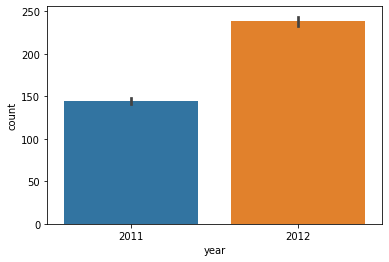

In [11]:
# 연도별 대여 수량
sns.barplot(x = 'year', y='count', data = bike)

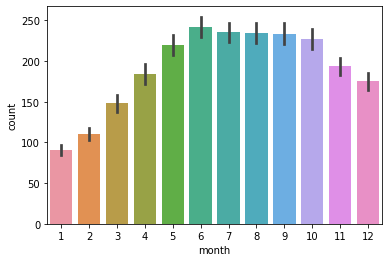

In [12]:
# 월별 대여 수량
sns.barplot(x = 'month', y='count', data = bike)
# 겨울보다 여름에 대여수량이 많음

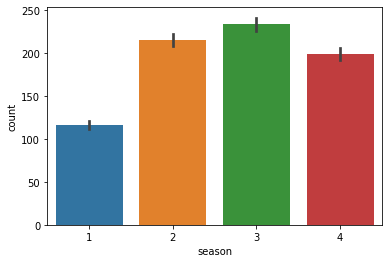

In [13]:
# 기존 계절과 비교
sns.barplot(x = 'season', y='count', data = bike)
# 봄이 가장 적음

In [14]:
# (봄 : 1, 여름 : 2, 가을 : 3, 겨울 : 4) -> 1: 1,2,3월 , 2: 4,5,6월 , 3: 7,8,9월 , 4 : 10,11,12 월인것같아 season과 월 비교
pd.crosstab(bike['season'], bike['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


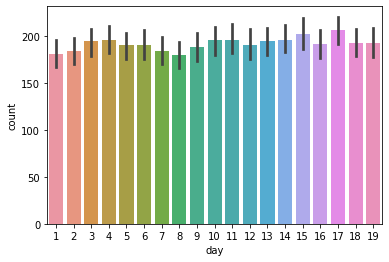

In [15]:
# 일별 대여 수량
sns.barplot(x = 'day', y='count', data = bike)
# 1~19일까지만 있음, 일별로 큰 차이는 없어보임

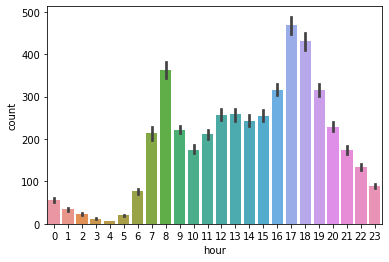

In [16]:
# 시간별 대여 수량
sns.barplot(x = 'hour', y='count', data = bike)
# 새벽엔 없고, 출퇴근시간에 많음 (오전 8시, 17~18시)

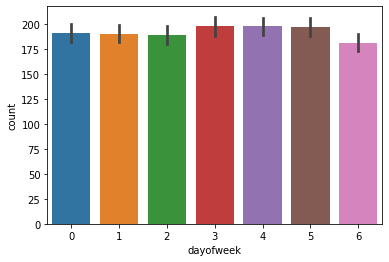

In [17]:
# 요일별 대여 수량
sns.barplot(x = 'dayofweek', y='count', data = bike)
# 0 : 월요일 ~ 6 : 일요일, 일요일이 가장 적지만 큰 차이는 없어보임

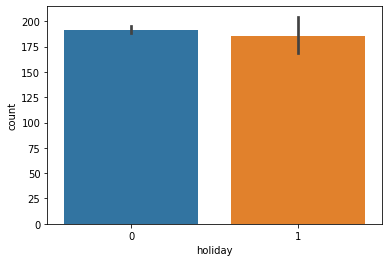

In [18]:
# 공휴일 여부에 따른 대여 수량
sns.barplot(x = 'holiday', y='count', data = bike)

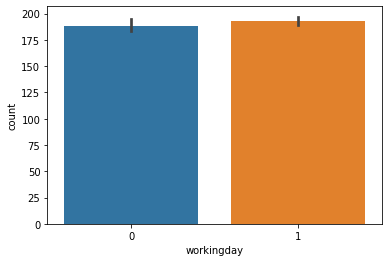

In [19]:
# 근무일 여부에 따른 대여 수량
sns.barplot(x = 'workingday', y='count', data = bike)
# 둘다 큰 차이 없어보임

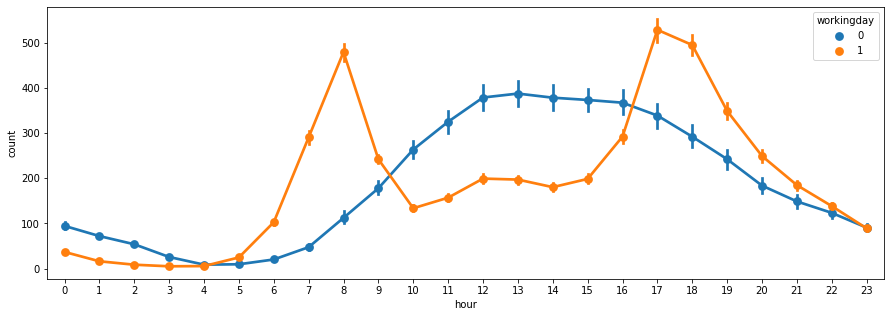

In [21]:
# 시간과 근무 여부에 따른 차이 비교
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.pointplot(x = 'hour', y='count', hue='workingday', data = bike) # 근무여부와 비교
# 근무일과 아닐때 시간대가 다름

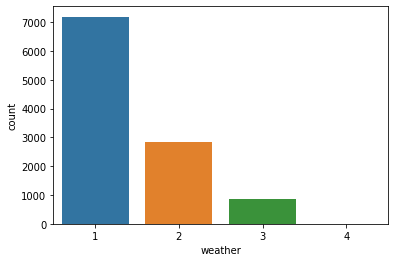

In [22]:
# 날씨별 대여 수량
sns.countplot(x = 'weather', data = bike)

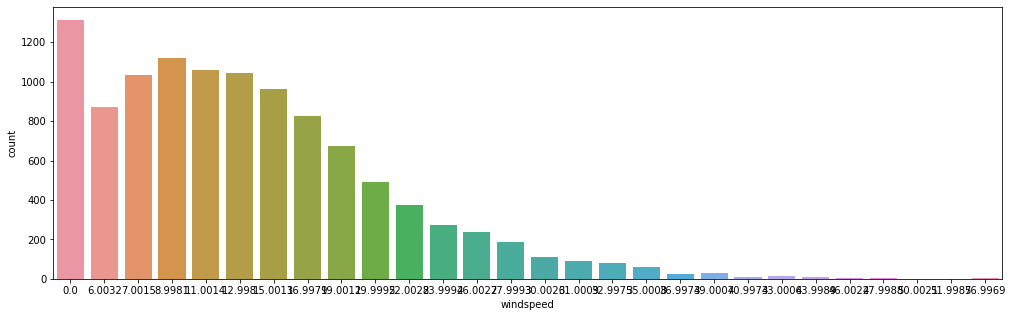

In [23]:
# 풍속 컬럼
plt.figure(figsize=(17, 5))
sns.countplot(data = bike, x='windspeed')

In [24]:
corr_bike = bike[['temp', 'atemp', 'humidity', 'windspeed','casual','registered', 'count']].corr()
corr_bike

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


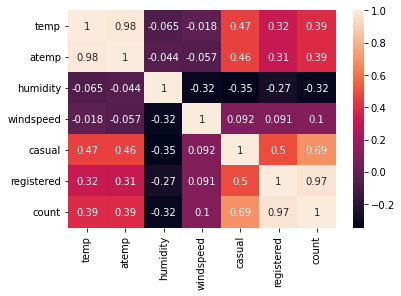

In [25]:
sns.heatmap(corr_bike, annot=True)
# temp와 atemp 의 상관계수가 0.98로, 거의 같으므로 temp만 사용